# Purpose: Experimentation with using the reproject library for image alignment, ultimately used SWarp since SWarp is faster as it is not implemented in Python

In [1]:
from astropy.io import fits
from astropy import wcs
import numpy as np
import glob
import matplotlib.pyplot as plt
from astropy.visualization import LinearStretch, ImageNormalize, ZScaleInterval
from astropy.visualization import BaseInterval
import random
import sys
import reproject
import astroalign

In [3]:
def convert_sci_to_ref(file):
    info = file.split("_")[3:-1]
    return "/media/rd1/ztf_neos/training_examples/resampled/ztf_" + "_".join(info[1:4] + info[5:6]) + "_refimg.resamp.fits"

# normalize for visualization
def normalize(arr):
    vmin, vmax = ZScaleInterval(1000).get_limits(arr)
    arr -= vmin
    arr /= vmax - vmin
    arr = np.clip(arr, 0, 1)
    return arr

In [4]:
def align(sci_fits, ref_fits):
    sci, sci_header = sci_fits
    ref, ref_header = ref_fits
    
    ref_aligned, footprint = reproject.reproject_interp((ref, ref_header), sci_header)
    
    return ref_aligned

In [5]:
filenames = glob.glob("/media/rd1/ztf_neos/training_examples/resampled/*")
filename_pairs = [(file, convert_sci_to_ref(file)) for file in filenames if "sciimg.resamp.fits" in file]

In [5]:
%%timeit
sci, ref = random.choice(filename_pairs)
sci, sci_header = fits.getdata(sci, header=True)
ref, ref_header = fits.getdata(ref, header=True)

ref_aligned = align((sci, sci_header), (ref, ref_header))

8.75 s ± 695 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%%timeit
sci, ref = random.choice(filename_pairs)
sci, sci_header = fits.getdata(sci, header=True)
ref, ref_header = fits.getdata(ref, header=True)

ref_aligned = align((sci, sci_header), (ref, ref_header))

8.46 s ± 234 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


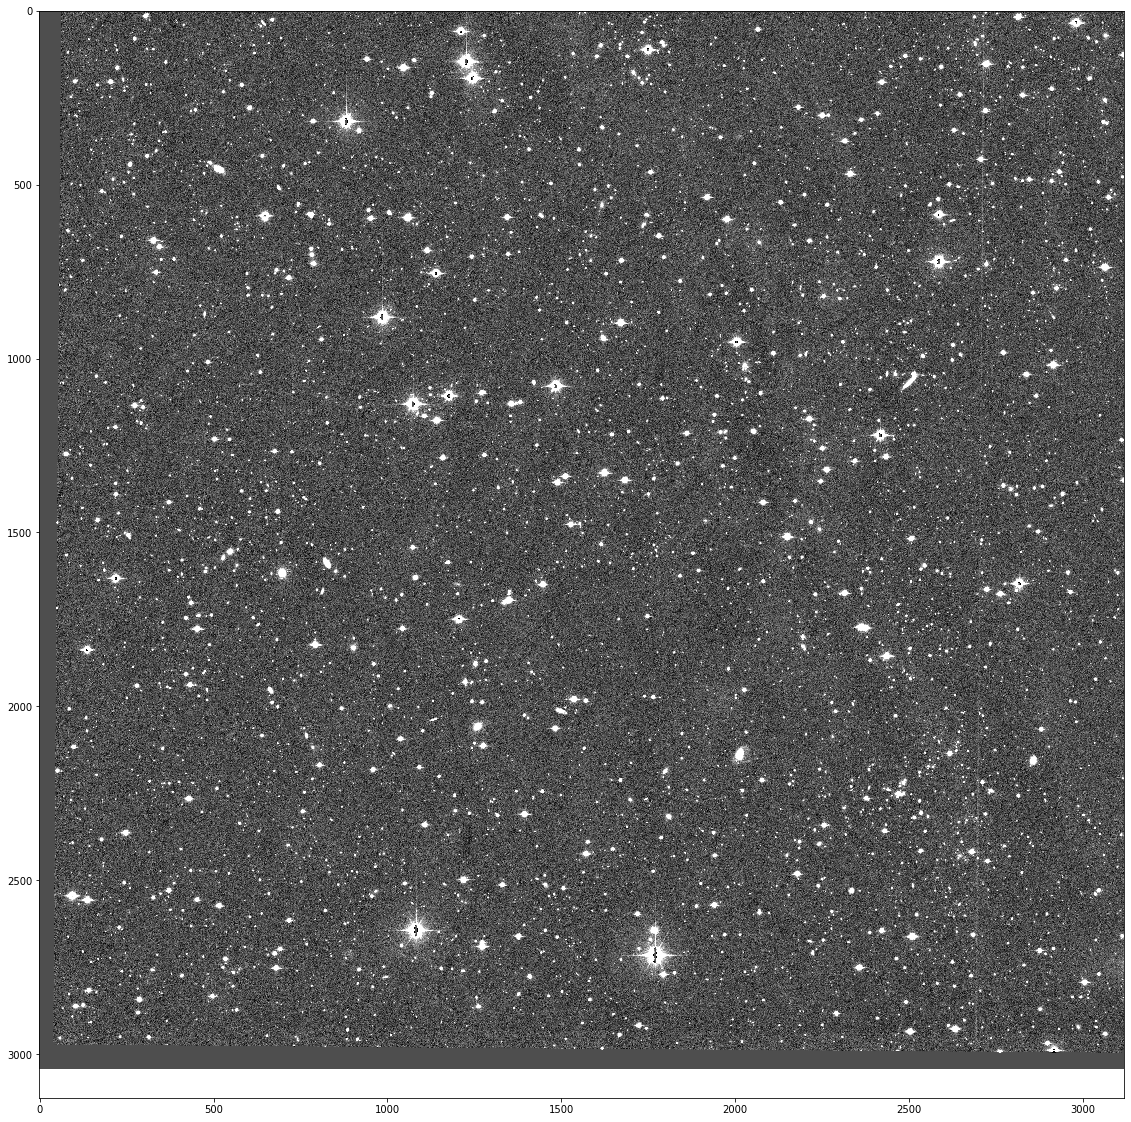

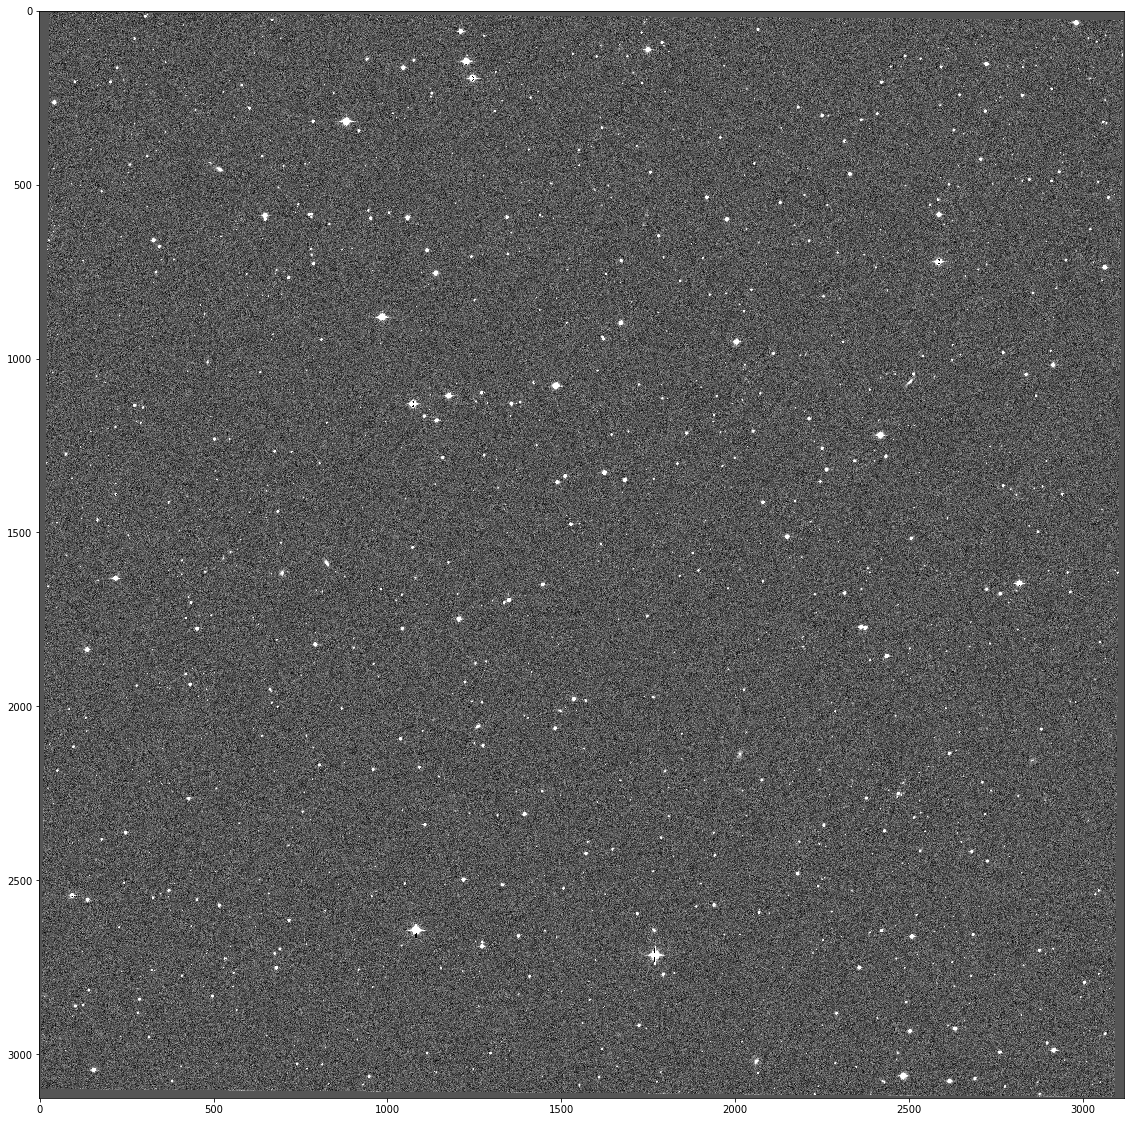

In [6]:
plt.figure(figsize=(20, 20))
plt.imshow(normalize(ref_aligned), cmap="gray")
plt.figure(figsize=(20, 20))
plt.imshow(normalize(sci), cmap="gray")

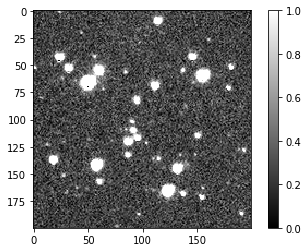

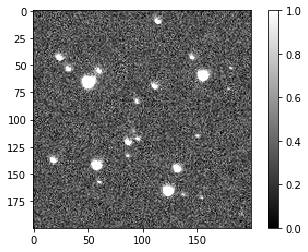

In [32]:
plt.imshow((normalize(ref_aligned)[2800:3000, 2800:3000]), cmap="gray")
plt.colorbar()
plt.figure()
plt.imshow((normalize(sci)[2800:3000, 2800:3000]), cmap="gray")
plt.colorbar()

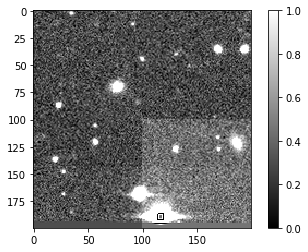

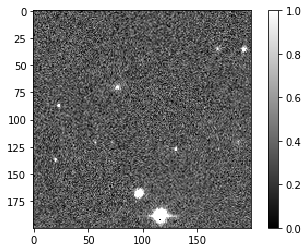

In [23]:
plt.imshow((normalize(ref_aligned)[2800:3000, 2800:3000]), cmap="gray")
plt.colorbar()
plt.figure()
plt.imshow((normalize(sci)[2800:3000, 2800:3000]), cmap="gray")
plt.colorbar()

In [22]:
%%timeit
normalize(ref_aligned)[2800:3000, 2800:3000]

62.5 ms ± 43.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%%time
sci, ref = random.choice(filename_pairs)
sci, sci_header = fits.getdata(sci, header=True)
ref, ref_header = fits.getdata(ref, header=True)

CPU times: user 5.56 ms, sys: 135 µs, total: 5.69 ms
Wall time: 28.1 ms


In [28]:
%%time
transform, _ = astroalign.find_transform(sci, ref)
sci, _ = astroalign.apply_transform(transform, sci, ref)

MaxIterError: Max iterations exceeded while trying to find acceptable transformation.

TypeError: Invalid shape (2, 3196, 3196) for image data

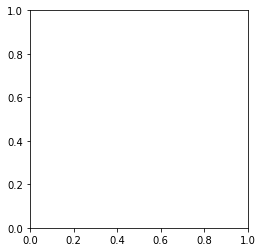

In [19]:
plt.imshow(sci)